In [1]:
import os

os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

In [2]:
import sys
sys.path.append('..')

from datetime import datetime

import pandas as pd
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow
from bizdays import Calendar, set_option

import brasa

man = brasa.engine.CacheManager()

In [7]:
tb_di1_curve_standard_returns = brasa.get_dataset("b3-curves-di1-standard-returns").to_table()
tb_di1_curve_standard_returns.filter(pc.field("symbol").isin(["DI1T21", "DI1T252", "DI1T2520"])).to_pandas().pivot_table(index="refdate", columns="symbol", values="returns").plot(alpha=0.5)

<Axes: xlabel='refdate'>

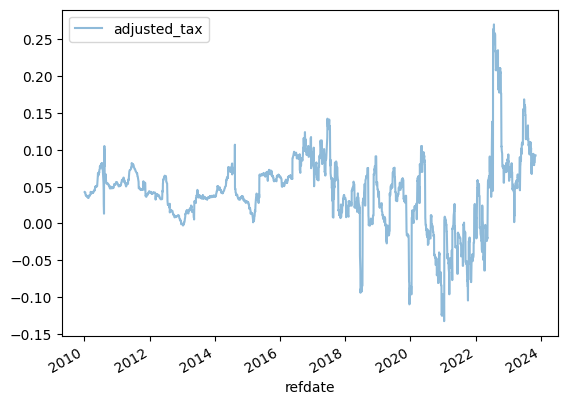

In [12]:
df_first_dap = brasa.get_dataset("b3-futures-dap-first-generic").to_table().to_pandas()
df_first_dap.plot(x="refdate", y="adjusted_tax", alpha=0.5)

<Axes: xlabel='refdate'>

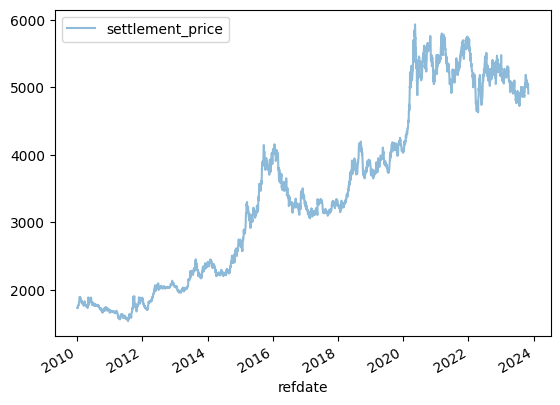

In [16]:
df_first_dol = brasa.get_dataset("b3-futures-dol-first-generic").to_table().to_pandas()
df_first_dol.plot(x="refdate", y="settlement_price", alpha=0.5)

<Axes: xlabel='refdate'>

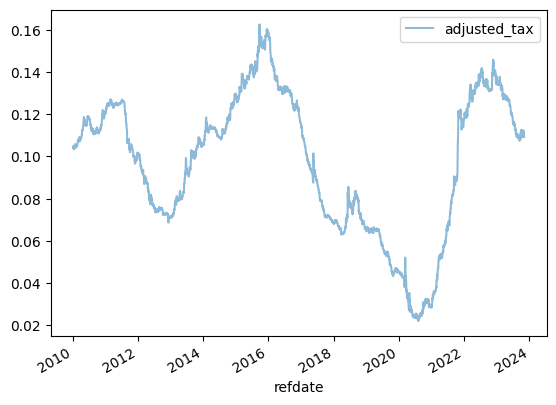

In [18]:
tb_di1_curve_standard = brasa.get_dataset("b3-curves-di1-standard").to_table()
tb_di1_curve_standard.filter(pc.field("symbol") == "DI1T252").to_pandas().plot(x="refdate", y="adjusted_tax", alpha=0.5)

<Axes: xlabel='refdate'>

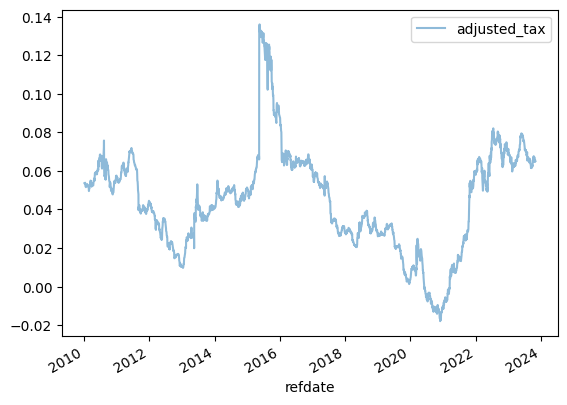

In [20]:
tb_dap_curve_standard = brasa.get_dataset("b3-curves-dap-standard").to_table()
tb_dap_curve_standard.filter(pc.field("symbol") == "DAPT252").to_pandas().plot(x="refdate", y="adjusted_tax", alpha=0.5)

In [25]:
di1 = tb_di1_curve_standard.filter(pc.field("symbol") == "DI1T252").to_pandas().set_index("refdate")
dap = tb_dap_curve_standard.filter(pc.field("symbol") == "DAPT252").to_pandas().set_index("refdate")

<Axes: xlabel='refdate'>

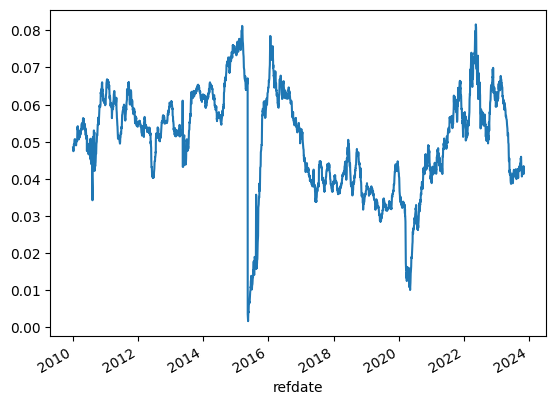

In [27]:
((1 + di1["adjusted_tax"]) / (1 + dap["adjusted_tax"]) - 1).plot()